# [Detekcja pojazdów](https://www.kaggle.com/datasets/ashfakyeafi/road-vehicle-images-dataset)
Użyteczne linki:  
[Exploring your image datasets the right way](https://raychunyin00.medium.com/computer-vision-exploring-your-image-datasets-the-right-way-538c5ae8ca5d)


# Opis problemu i danych
Problem - detekcja i klasyfikacja pojazdów na obrazie  
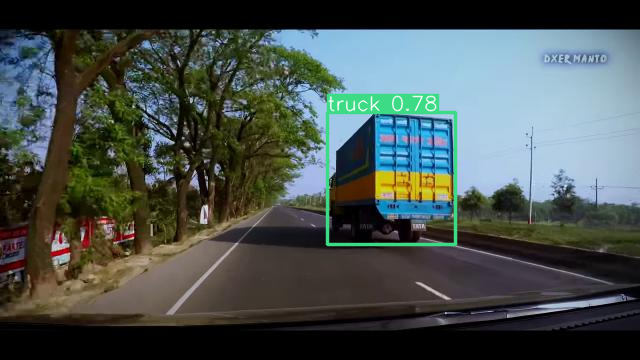

Problem identyfikacji i klasyfikacji obiektu zostaje sprowadzony do problemu klasy regresji poprzez użycie technik YOLO. Połączenia Algorytm YOLO próbuje przeformułować wykrywanie obiektów w pojedynczy problem regresji, łącznie z pikselami obrazu, na prawdopodobieństwa klas i współrzędne ramki ograniczającej. Dlatego algorytm musi spojrzeć na obraz tylko raz, aby przewidzieć i zlokalizować obiekty docelowe na obrazach. 

In [1]:
import os
import random
import yaml
import cv2

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from typing import List, Tuple
plt.style.use('seaborn-v0_8-darkgrid')

Matplotlib is building the font cache; this may take a moment.


In [2]:
#user = "michal"
user = "albert"

if user == "michal":
    train_images = "archive/trafic_data/train/images"
    train_labels = "archive/trafic_data/train/labels"

    valid_images = "archive/trafic_data/valid/images"
    valid_labels = "archive/trafic_data/valid/labels"

elif user == "albert":
    train_images = r"D:\vehicle_detection\trafic_data\train\images"
    train_labels = r"D:\vehicle_detection\trafic_data\train\labels"

    valid_images = r"D:\vehicle_detection\trafic_data\valid\images"
    valid_labels = r"D:\vehicle_detection\trafic_data\valid\labels"



## Wizualizacja danych treningowych - *zdjęć z labelami*

['0 0.5354166666666667 0.4734375 0.13125 0.084375', '19 0.24375 0.46875 0.21666666666666667 0.0875', '5 0.46041666666666664 0.4765625 0.035416666666666666 0.040625', '4 0.7979166666666667 0.471875 0.18333333333333332 0.1546875', '5 0.6166666666666667 0.46875 0.035416666666666666 0.021875', '5 0.6666666666666666 0.4703125 0.0375 0.021875', '19 0.6895833333333333 0.465625 0.020833333333333332 0.01875']
['5 0.621875 0.7722222222222223 0.128125 0.25', '4 0.8359375 0.6083333333333333 0.325 0.5833333333333334', '4 0.4953125 0.425 0.175 0.17777777777777778', '15 0.5546875 0.575 0.121875 0.1638888888888889', '17 0.609375 0.5277777777777778 0.0859375 0.12777777777777777', '10 0.1828125 0.475 0.0328125 0.09166666666666666', '10 0.1015625 0.8472222222222222 0.1390625 0.17222222222222222', '10 0.0609375 0.9333333333333333 0.121875 0.12777777777777777', '13 0.0296875 0.4638888888888889 0.0265625 0.09444444444444444', '13 0.0234375 0.6527777777777778 0.046875 0.11944444444444445', '5 0.3375 0.452777

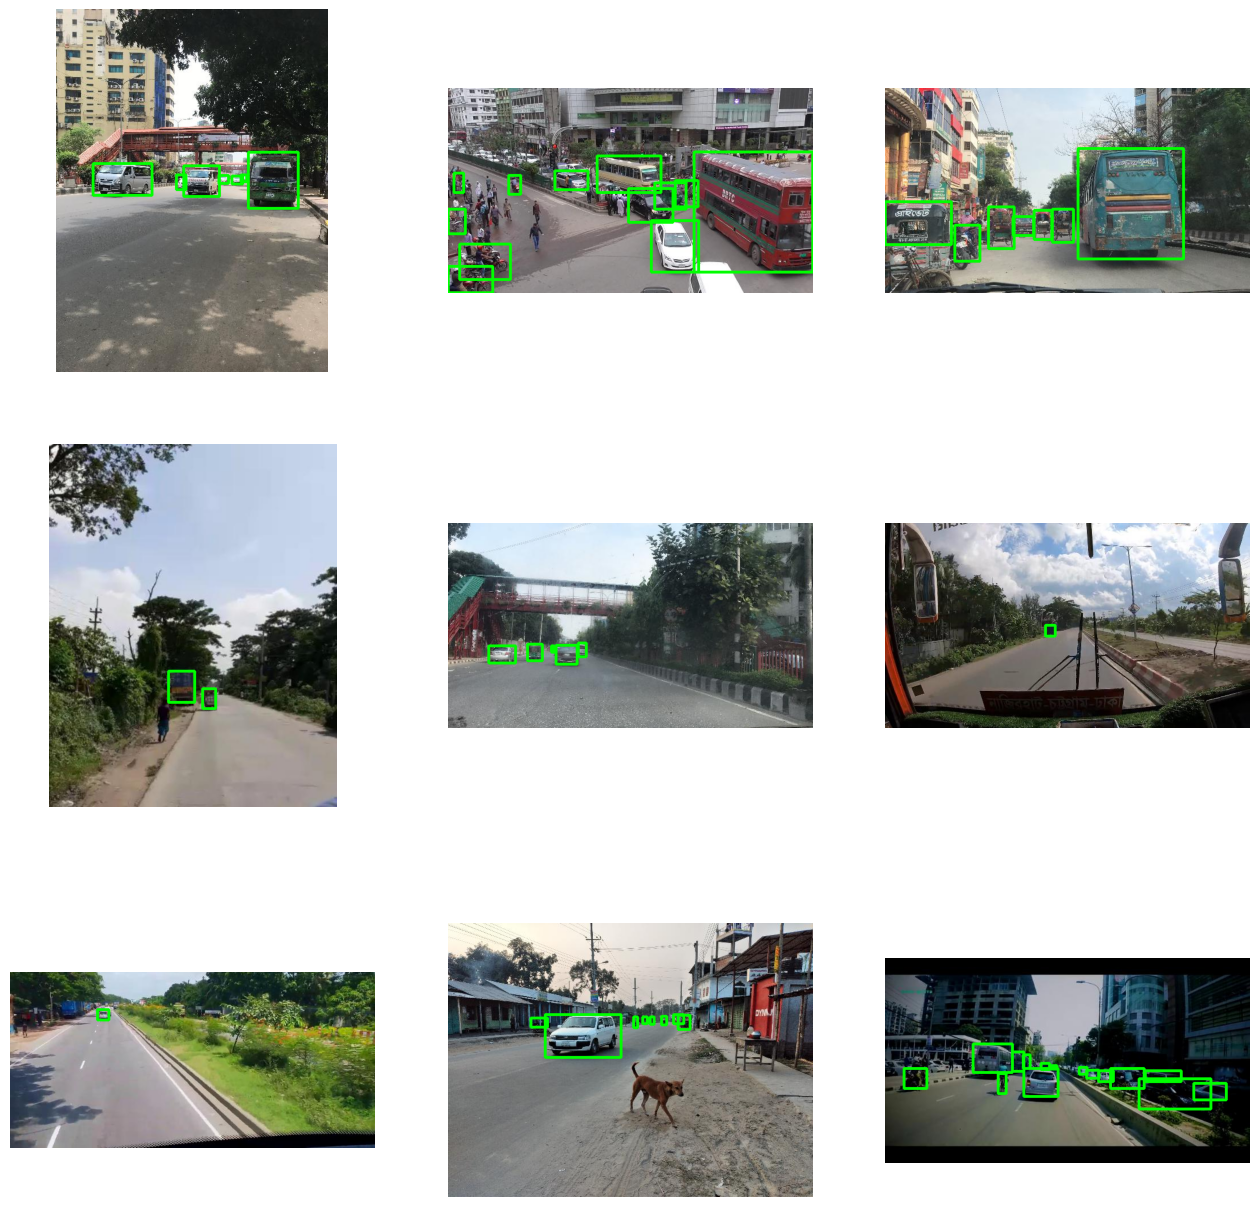

In [3]:
def load_labels(image_file, train_labels):
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    
    return labels



def plot_object_detections(ax, image, labels):
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.axis('off')



image_files = os.listdir(train_images)
image_files_valid = os.listdir(valid_images)

random_images = random.sample(image_files, 9)

#print(image_files)


fig, axs = plt.subplots(3, 3, figsize=(16, 16))


for i, image_file in enumerate(random_images):
    row, col = divmod(i, 3)
    
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    labels = load_labels(image_file, train_labels)
    print(labels)
    plot_object_detections(axs[row, col], image, labels)

plt.show()

In [4]:
if user == "michal":
    with open('archive/trafic_data/data_1.yaml', 'r') as f:
        data = f.read()
        
elif user == "albert":
    with open(r"D:\vehicle_detection\trafic_data\data_1.yaml", 'r') as f:
        data = f.read()
          
print(data)

train: ../train/images
val: ../valid/images

nc: 21
names: ['ambulance', 'army vehicle', 'auto rickshaw', 'bicycle', 'bus', 'car', 'garbagevan', 'human hauler', 'minibus', 'minivan', 'motorbike', 'pickup', 'policecar', 'rickshaw', 'scooter', 'suv', 'taxi', 'three wheelers -CNG-', 'truck', 'van', 'wheelbarrow']


In [5]:
h, w, c = image.shape 
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x359 and 3 channels.


In [6]:
print(f"Długość zbioru train: {len(image_files)}")
print(f"Długość zbioru valid: {len(image_files_valid)}")
print(f"% Valid: {len(image_files_valid) * 100 / (len(image_files_valid) + len(image_files))}")

Długość zbioru train: 2704
Długość zbioru valid: 300
% Valid: 9.986684420772304


In [7]:
shapes_df_train = pd.DataFrame()
heights = []
widths = []
channels = []
for i, image_file in enumerate(image_files):
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)
    
    shape = image.shape
    heights.append(shape[0])
    widths.append(shape[1])
    channels.append(shape[2])

shapes_df_train['width'] = widths
shapes_df_train['height'] = heights
shapes_df_train['channel'] = channels

shapes_df_valid =  pd.DataFrame()
heights = []
widths = []
channels = []
for i, image_file in enumerate(image_files_valid):
    image_path = os.path.join(valid_images, image_file)
    image = cv2.imread(image_path)
    
    shape = image.shape
    heights.append(shape[0])
    widths.append(shape[1])
    channels.append(shape[2])

shapes_df_valid['width'] = widths
shapes_df_valid['height'] = heights
shapes_df_valid['channel'] = channels

In [8]:
print(f"""Unique (Width, Height, Channel) values for train data: {
    len(shapes_df_train['width'].unique()),
    len(shapes_df_train['height'].unique()),
    len(shapes_df_train['channel'].unique())
    }""")

print(f"""Unique (Width, Height, Channel) values for valid data: {
    len(shapes_df_valid['width'].unique()),
    len(shapes_df_valid['height'].unique()),
    len(shapes_df_valid['channel'].unique())
    }""")

Unique (Width, Height, Channel) values for train data: (73, 200, 1)
Unique (Width, Height, Channel) values for valid data: (2, 4, 1)


In [9]:
print(f"""Unikalne kombinacje train: {
    len(shapes_df_train[['width', 'height', 'channel']].drop_duplicates())
    }""")

print(f"""Unikalne kombinacje valid: {
    len(shapes_df_valid[['width', 'height', 'channel']].drop_duplicates())
    }""")

Unikalne kombinacje train: 270
Unikalne kombinacje valid: 4


In [10]:
print('train images')
print(shapes_df_train.value_counts()[:5])


print('valid images')
print(shapes_df_valid.value_counts()[:5])

train images
width  height  channel
640    360     3          1510
360    640     3           274
480    640     3           138
640    359     3           132
       362     3            85
Name: count, dtype: int64
valid images
width  height  channel
640    360     3          162
       359     3          136
1125   614     3            1
       621     3            1
Name: count, dtype: int64


Widać, że najpopularniejsza kombinacja to 640x360 i vice versa.

In [11]:
# treating WxH as HxW
most_popular_shape = shapes_df_train.value_counts()[:2]
print(f"% zbioru jaki ma najpopularniejsza ({most_popular_shape[:1].index.names}) rozdzielczość: {most_popular_shape.sum()/len(shapes_df_train)*100:.2f} %")

most_popular_shape = shapes_df_valid.value_counts()[:2]
print(f"% zbioru jaki ma najpopularniejsza ({most_popular_shape[:1].index.names}) rozdzielczość: {most_popular_shape.sum()/len(shapes_df_valid)*100:.2f} %")

% zbioru jaki ma najpopularniejsza (['width', 'height', 'channel']) rozdzielczość: 65.98 %
% zbioru jaki ma najpopularniejsza (['width', 'height', 'channel']) rozdzielczość: 99.33 %


In [12]:
del shapes_df_train
del shapes_df_valid

In [13]:
def files_to_df(files,images):

    mean_r_values = []
    mean_g_values = []
    mean_b_values = []
    mean_values = []
    for i, image_file in enumerate(files):
        image_path = os.path.join(images, image_file)
        image = cv2.imread(image_path)

        mean_r_value = np.mean(image[:, :, 0])
        mean_r_values.append(mean_r_value)

        mean_g_value = np.mean(image[:, :, 1])
        mean_g_values.append(mean_g_value)

        mean_b_value = np.mean(image[:, :, 2])
        mean_b_values.append(mean_b_value)

        mean_value = np.mean(image)
        mean_values.append(mean_value)
        
    df = pd.DataFrame()
    df['r_mean'] = mean_r_values
    df['g_mean'] = mean_g_values
    df['b_mean'] = mean_b_values

    return df

In [14]:
def normalization_tests(color_df):

    stat, p = shapiro(color_df)
    print(f"Shapiro-Wilk score: {stat}, p-value: {p}")

    stat, p = kstest(color_df["r_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for r_mean: {stat}, p-value: {p}")


    stat, p = kstest(color_df["g_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for g_mean: {stat}, p-value: {p}")


    stat, p = kstest(color_df["b_mean"],"norm")
    print(f"Kolmogorow-Smirnow score for b_mean: {stat}, p-value: {p}")

In [15]:
def plot_colors(files,images):

    color_df = files_to_df(files,images)

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    plt.rcParams['lines.linewidth'] = 0.5

    sns.kdeplot(color_df['r_mean'], color='r', fill=True, label=f'Red Mean = {np.mean(color_df.r_mean):.1f}')
    sns.kdeplot(color_df['g_mean'], color='g', fill=True, label=f'Green Mean = {np.mean(color_df.g_mean):.1f}')
    sns.kdeplot(color_df['b_mean'], color='b', fill=True, label=f'Blue Mean = {np.mean(color_df.b_mean):.1f}')

    plt.xlabel('Value')
    plt.ylabel('Density')

    plt.legend()
    plt.show()


    color_df.describe()

    normalization_tests(color_df)

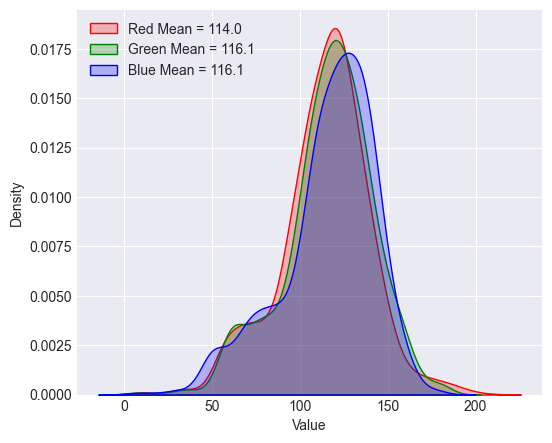

C:\Users\adank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8112.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk score: 0.9743929787723786, p-value: 1.0075286838187742e-35
Kolmogorow-Smirnow score for r_mean: 0.9999999999984994, p-value: 0.0
Kolmogorow-Smirnow score for g_mean: 0.9996301699976553, p-value: 0.0
Kolmogorow-Smirnow score for b_mean: 0.9996293972858735, p-value: 0.0


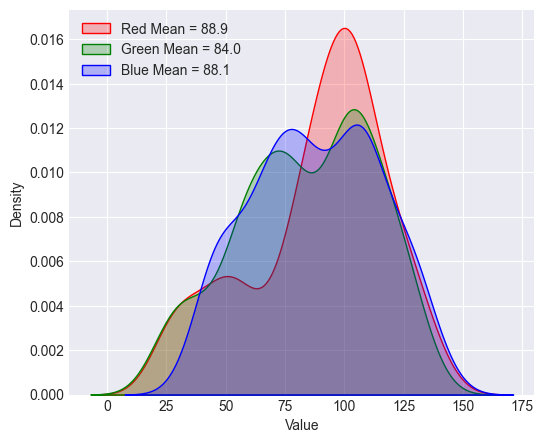

Shapiro-Wilk score: 0.9746267260271092, p-value: 2.0518171613754277e-11
Kolmogorow-Smirnow score for r_mean: 1.0, p-value: 0.0
Kolmogorow-Smirnow score for g_mean: 1.0, p-value: 0.0
Kolmogorow-Smirnow score for b_mean: 1.0, p-value: 0.0


In [16]:
plot_colors(image_files,train_images)
plot_colors(image_files_valid,valid_images)

Jak widać na powyższym wykresie i statystykach, rozkład kolorów jest podobny oraz w miarę zrównoważony. Widać także, że średnia kolorów jest raczej poniżej spodziewanej średniej standardowego rozkładu kolorów (średnia 128). Natomiast test Shapiro-Wilka na normalizację wskazuje wysoki wynik z niezwykle niskim p-value, co oznacza, że wynik ma bardzo niskie prawdopodobieństwo bycia przypadkiem. Zatem można obyć się bez normalizacji.

Ostrzeżenie, które pojawia się podczas uruchamiania testu Shapiro-Wilka wskazuje na to, że mogą pojawiać się pewne niedokładności z powodu przeznaczenia tego testu głównie dla małych prób. Progiem istotności jest p=0.05, nasz wynik jest nieporównywalnie mniejszy, natomiast wykonaliśmy jeszcze test Kolmogorowa-Smirnowa, który powinien zwracać dokładniejszy wynik dla tak dużych prób, jak ta. Wyniki są jeszcze badziej zbliżone do idealnych, stąd odrzucamy istotność testu, czyli hipotezę zerową dla rozkładu normalnego. 

Histogram dla zmiennej wyjściowej:


In [17]:
if user == "michal":
    with open('archive/trafic_data/data_1.yaml', 'r') as f:
        data = f.readlines()
    
elif user == "albert":
    with open(r"D:\vehicle_detection\trafic_data\data_1.yaml", 'r') as f:
        data = f.readlines()


vehicles_str = data[4].split(": ")[1].replace("[","").replace("]","")
vehicles_str = list(vehicles_str.split(", "))

classes_of_vehicles = []

for vehicle in vehicles_str:

    vehicle = vehicle.replace("'","")
    classes_of_vehicles.append(vehicle)


In [18]:
vehicles_counter = [0] * len(classes_of_vehicles)

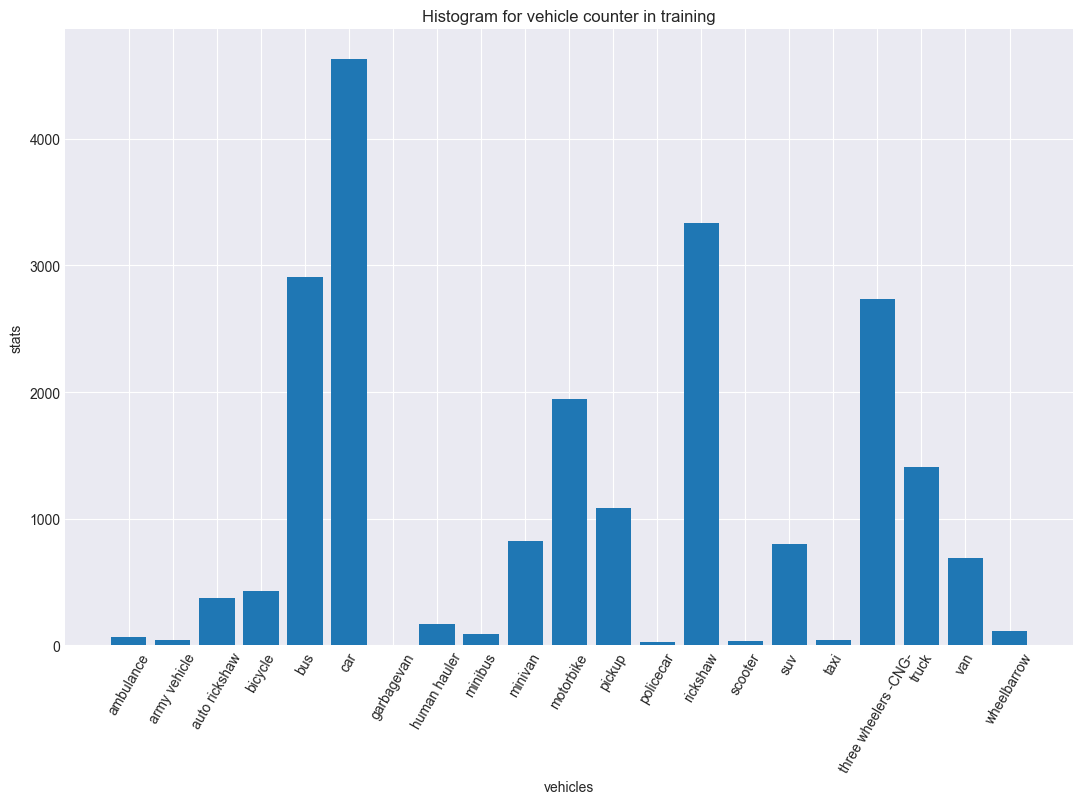

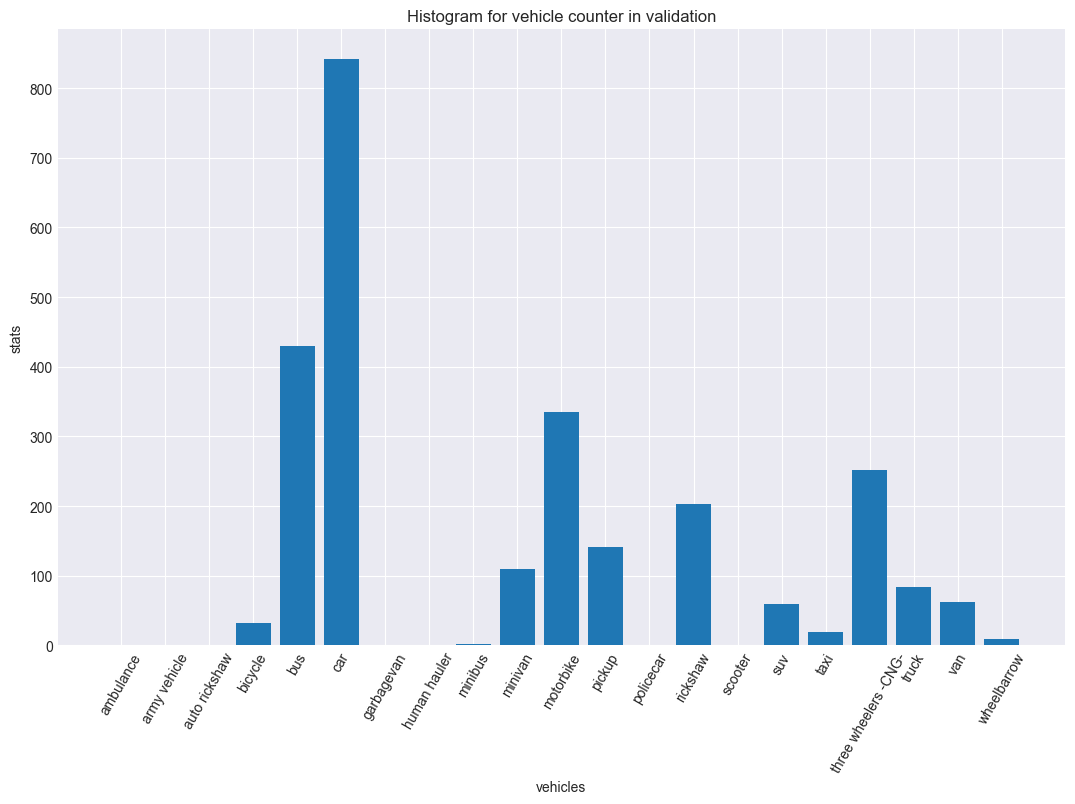

In [19]:
train_vehicles_counter = [0] * len(classes_of_vehicles)
valid_vehicles_counter = [0] * len(classes_of_vehicles)

for i, image_file in enumerate(image_files):


    labels = load_labels(image_file, train_labels)
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                train_vehicles_counter[vehicle_nr] += 1

# print(train_vehicles_counter)
# print(classes_of_vehicles)

plt.figure(figsize=(13, 8))
plt.bar(classes_of_vehicles, train_vehicles_counter)
plt.title('Histogram for vehicle counter in training', fontsize=12)
plt.xlabel('vehicles', fontsize=10)
plt.ylabel('stats', fontsize=10)
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.show()


for i, image_file in enumerate(image_files_valid):

    labels = load_labels(image_file, valid_labels)
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                valid_vehicles_counter[vehicle_nr] += 1



plt.figure(figsize=(13, 8))
plt.bar(classes_of_vehicles, valid_vehicles_counter)
plt.title('Histogram for vehicle counter in validation', fontsize=12)
plt.xlabel('vehicles', fontsize=10)
plt.ylabel('stats', fontsize=10)
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.show()

In [20]:
def accumulate_results(_list: List[Tuple[any, any]], threshold: int):
    other_count = 0
    other_classes_count = 0
    for i, (count, class_name) in enumerate(_list):
        if count < threshold:
            _list[i] = (count, 'other')
            other_count += count
            other_classes_count+=1
        else:
            break

    if other_count > 0:
        _list = [(other_count, f'other ({other_classes_count} classes)')] + _list[i:]
    
    return zip(*_list)

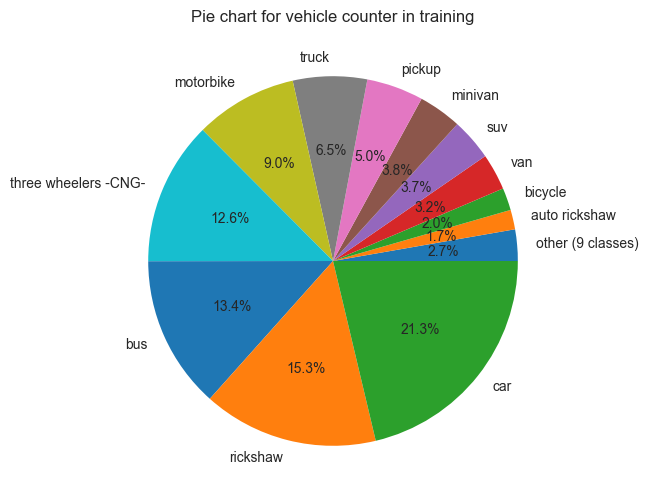

In [21]:
sorted_vehicles = sorted(list(zip(train_vehicles_counter, classes_of_vehicles)), key=lambda x: x[0])

sorted_train_vehicles_counter, sorted_classes_of_vehicles = accumulate_results(sorted_vehicles, 200)

plt.figure(figsize=(6, 6))
plt.pie(sorted_train_vehicles_counter, labels=sorted_classes_of_vehicles, autopct='%1.1f%%')
plt.title('Pie chart for vehicle counter in training', fontsize=12)
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.show()

In [22]:
print(f"Udział pierwszych 4 klas: {sum(sorted_train_vehicles_counter[-4:]) *100 / sum(sorted_train_vehicles_counter):.2f}")
print(f"Udział pierwszych 9 klas: {sum(sorted_train_vehicles_counter[-9:]) *100 / sum(sorted_train_vehicles_counter):.2f}")

Udział pierwszych 4 klas: 62.54
Udział pierwszych 9 klas: 90.40


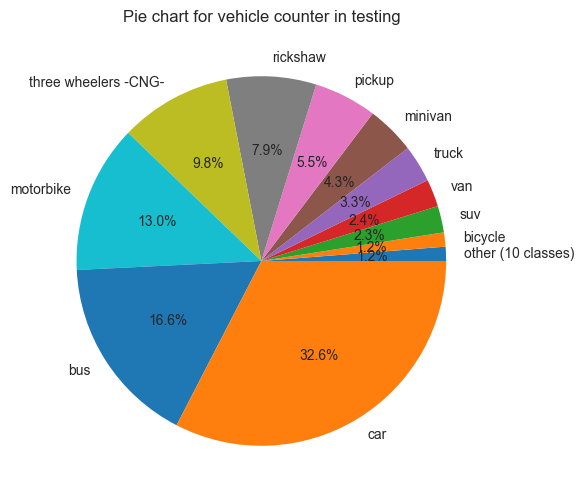

In [23]:
sorted_vehicles = sorted(list(zip(valid_vehicles_counter, classes_of_vehicles)), key=lambda x: x[0])

sorted_valid_vehicles_counter, sorted_classes_of_vehicles = accumulate_results(sorted_vehicles, 20)

plt.figure(figsize=(6, 6))
plt.pie(sorted_valid_vehicles_counter, labels=sorted_classes_of_vehicles, autopct='%1.1f%%')
plt.title('Pie chart for vehicle counter in testing', fontsize=12)
plt.xticks(fontsize=10,rotation=60)
plt.yticks(fontsize=10)
plt.show()

## Ustalenie Udziału procentowego klas w zbiorach treningowym i walidacyjnym (testowym)

In [24]:
all_vehicles_counter = [x[0] + x[1] for x in zip(train_vehicles_counter, valid_vehicles_counter)]
train_vehicles_percentage = [x[0]*100/x[1] for x in zip(train_vehicles_counter, all_vehicles_counter)]
valid_vehicles_percentage = [x[0]*100/x[1] for x in zip(valid_vehicles_counter, all_vehicles_counter)]

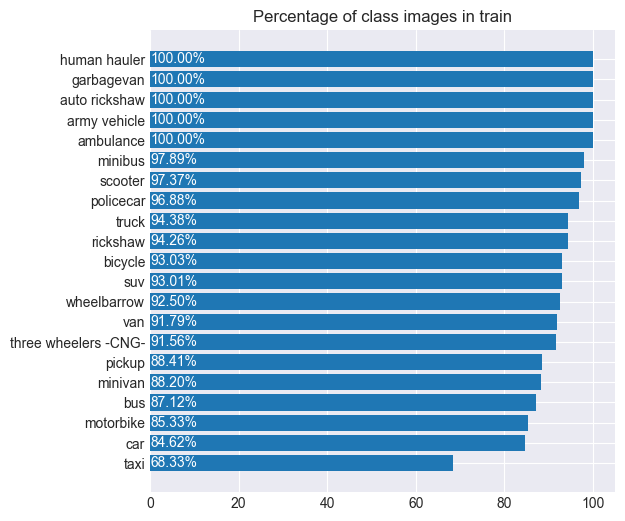

In [25]:
sorted_vehicles = sorted(list(zip(train_vehicles_percentage, classes_of_vehicles)), key=lambda x: x[0])

sorted_train_vehicles_percentage, sorted_classes_of_vehicles = accumulate_results(sorted_vehicles, 5)

plt.figure(figsize=(6, 6))
plt.barh(sorted_classes_of_vehicles, sorted_train_vehicles_percentage)

for i, v in enumerate(sorted_train_vehicles_percentage):
    plt.annotate(f"{v:.2f}%", xy=(0, i), color='w', va='center')
    
plt.title('Percentage of class images in train', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Powyższy wykres można zinterpretować także słownie: jaki procent klas znajduje się w zbiorze treningowym (w przeciwieństwie do testowego)

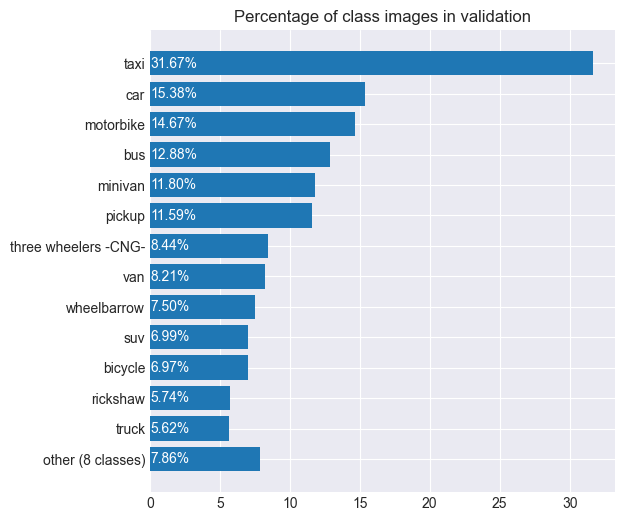

In [26]:
sorted_vehicles = sorted(list(zip(valid_vehicles_percentage, classes_of_vehicles)), key=lambda x: x[0])

sorted_valid_vehicles_percentage, sorted_classes_of_vehicles = accumulate_results(sorted_vehicles, 5)

plt.figure(figsize=(6, 6))
plt.barh(sorted_classes_of_vehicles, sorted_valid_vehicles_percentage)

for i, v in enumerate(sorted_valid_vehicles_percentage):
    plt.annotate(f"{v:.2f}%", xy=(0, i), color='w', va='center')
    
plt.title('Percentage of class images in validation', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Podsumowanie sekcji
- 21 klas
- zbiór posiada 2704 obrazy
- istnieje wiele unikalnych wartości wysokości i szerokości obrazów, natomiast wartość kanałów jest jedna: 3 (RGB).
- unikalnych kombinacji tych trzech parametrów jest 270.  
- najpopularniejsza z nich (640x360 i odwrotnie) to około 66% całego zbioru. podczas transformacji warto będzie się przyglądnąć temu rozkładowi.

Oznacza to, że model albo musi być uniwersalny w przyjmowaniu rozmiarów wejściowych, albo obrazy należy zmodyfikować (a tym samym zmienić proporcje z np. 16:9 -> 1:1 {ustalona wielkość})  
Jedyne dane jakie posiadamy w tej chwili to dane zdjęcia, czyli zmienne traktowane ilościowo.  
  
Przeglądając te zdjęcia można zauważyć, że są one prawdopodobnie wyłącznie w jednym kraju, zapewne Azjatyckim. (Mój typ: Indie lub Tajlandia).

Rozkład kolorów na zdjęciu jest zrównoważony i bardzo zbliżony do rozkładu normalnego, jak to ukazazał nam test Shapiro-Wilka (0.97 z p-value 10^(-35)) oraz Kołmogorowa-Smirnowa, zatem nie jest konieczna normalizacja.

Problematyczne są niezbalansowane klasy. Zdecydowanie jest najwięcej samochodów, następnie w podobnych ilościach są riksze, busy oraz trójkołowce (zmotoryzowane riksze na gaz). Potem stopniowo co raz mniej znaczące są klasy.

Cztery największe klasy - Samochody, busy i riksze ( + zmotoryzowane) na tych obecnych zdjęciach zajmują ponad 62,5% zbioru.  
Natomiast 9 największych klas to ponad 90% wszystkich klas. Na późniejszych etapach konieczne będzie wzięcie tego faktu pod uwagę

# Obróbka danych

Co należy zrobić:  

Wyznaczony zbiór danych jest niedoreprezentowany. Jak widać na histogramie danych walidacyjnych, 7 zmiennych nie ma ani jednego przykładu testowego. Konieczne jest zrebalansowanie obecnego stanu rzeczy.

In [27]:
# collect data into single dataframe

all_images = []
all_images.extend(image_files)
all_images.extend(image_files_valid)

all_images_directory = []
all_images_directory.extend([train_images for img in image_files])
all_images_directory.extend([valid_images for img in image_files_valid])

all_images_label_directory = []
all_images_label_directory.extend([train_labels for img in image_files])
all_images_label_directory.extend([valid_labels for img in image_files_valid])

In [28]:
# df will be two datasets connected in single

df = pd.DataFrame()
df['directory'] = all_images_directory
df['label_directory'] = all_images_label_directory
df['image'] = all_images

In [29]:
df.head()

directory  \
0  D:\vehicle_detection\trafic_data\train\images   
1  D:\vehicle_detection\trafic_data\train\images   
2  D:\vehicle_detection\trafic_data\train\images   
3  D:\vehicle_detection\trafic_data\train\images   
4  D:\vehicle_detection\trafic_data\train\images   

                                 label_directory  \
0  D:\vehicle_detection\trafic_data\train\labels   
1  D:\vehicle_detection\trafic_data\train\labels   
2  D:\vehicle_detection\trafic_data\train\labels   
3  D:\vehicle_detection\trafic_data\train\labels   
4  D:\vehicle_detection\trafic_data\train\labels   

                                            image  
0  01_jpg.rf.8d8a2f0f90d5b83893cd252acd832c93.jpg  
1  02_jpg.rf.65a084066fc353cd023eb5c953f40efe.jpg  
2  03_jpg.rf.4532f2db68433995da09f54e215160f3.jpg  
3  04_jpg.rf.c0b83432c4d09c7cbeaac18e14c4a54a.jpg  
4  05_jpg.rf.11a2e7ce391a1e74960099f7923f27f5.jpg

Train image:


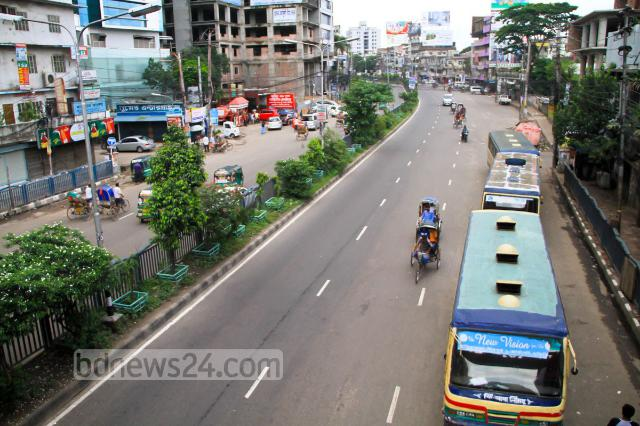

In [30]:
print("Train image:")
Image.open(os.path.join(all_images_directory[0], all_images[0]))

Test image:


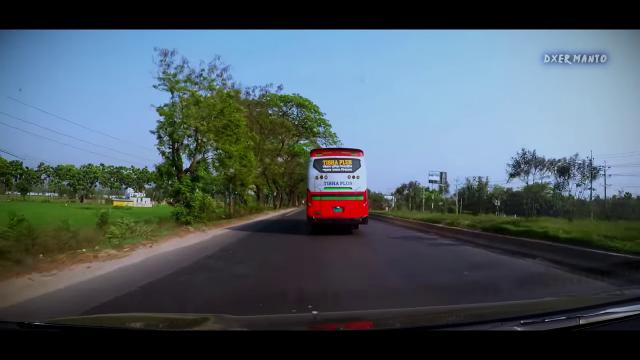

In [31]:
print("Test image:")
Image.open(os.path.join(all_images_directory[-1], all_images[-1]))

Poprzedni podział na dane treningowe i testowe uznajemy za nieważny i będziemy w przyszłości mieszać te dane w celu uzyskania lepszych rezultatów statystycznych. 

Dodajemy dane klasyfikacyjne do nowego zbioru danych:

In [32]:
classes = []

for i, row in df.iterrows():
    labels = load_labels(row['image'], row['label_directory'])
    image_classes = []
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                image_classes.append(vehicle_nr)
    classes.append(image_classes)
    
df['classes'] = classes

In [33]:
df

directory  \
0     D:\vehicle_detection\trafic_data\train\images   
1     D:\vehicle_detection\trafic_data\train\images   
2     D:\vehicle_detection\trafic_data\train\images   
3     D:\vehicle_detection\trafic_data\train\images   
4     D:\vehicle_detection\trafic_data\train\images   
...                                             ...   
2999  D:\vehicle_detection\trafic_data\valid\images   
3000  D:\vehicle_detection\trafic_data\valid\images   
3001  D:\vehicle_detection\trafic_data\valid\images   
3002  D:\vehicle_detection\trafic_data\valid\images   
3003  D:\vehicle_detection\trafic_data\valid\images   

                                    label_directory  \
0     D:\vehicle_detection\trafic_data\train\labels   
1     D:\vehicle_detection\trafic_data\train\labels   
2     D:\vehicle_detection\trafic_data\train\labels   
3     D:\vehicle_detection\trafic_data\train\labels   
4     D:\vehicle_detection\trafic_data\train\labels   
...                                             ...   
2999  D:\vehicle_detection\trafic_data\valid\labels   
3000  D:\vehicle_detection\trafic_data\valid\labels   
3001  D:\vehicle_detection\trafic_data\valid\labels   
3002  D:\vehicle_detection\trafic_data\valid\labels   
3003  D:\vehicle_detection\trafic_data\valid\labels   

                                                  image  \
0        01_jpg.rf.8d8a2f0f90d5b83893cd252acd832c93.jpg   
1        02_jpg.rf.65a084066fc353cd023eb5c953f40efe.jpg   
2        03_jpg.rf.4532f2db68433995da09f54e215160f3.jpg   
3        04_jpg.rf.c0b83432c4d09c7cbeaac18e14c4a54a.jpg   
4        05_jpg.rf.11a2e7ce391a1e74960099f7923f27f5.jpg   
...                                                 ...   
2999  Pias--404-_jpg.rf.fbdfbf989b0393f8b53767bf1931...   
3000  Pias--405-_jpg.rf.32ec5a12516f420a383a4807a9c6...   
3001  Pias--406-_jpg.rf.81e211763107ba138599adcf13f8...   
3002  Pias--407-_jpg.rf.ed2b7fe618a64b4423419620ebbb...   
3003  Pias--408-_jpg.rf.f322762334099d002a1c50be77fc...   

                                                classes  
0                                                    []  
1     [17, 19, 17, 10, 10, 10, 10, 10, 10, 10, 16, 1...  
2                                   [18, 4, 13, 18, 10]  
3     [11, 13, 4, 15, 5, 10, 4, 4, 4, 4, 4, 11, 4, 4...  
4     [5, 5, 17, 3, 15, 13, 5, 5, 10, 5, 5, 5, 19, 1...  
...                                                 ...  
2999                                            [4, 18]  
3000                                        [18, 18, 4]  
3001                                            [4, 18]  
3002                                                [4]  
3003                                                [4]  

[3004 rows x 4 columns]

In [34]:
# mix dataframe to split it once again to train, valid, test 

df_base_resampled = df.sample(frac=1).reset_index(drop=True)
df_base_resampled


directory  \
0     D:\vehicle_detection\trafic_data\train\images   
1     D:\vehicle_detection\trafic_data\train\images   
2     D:\vehicle_detection\trafic_data\train\images   
3     D:\vehicle_detection\trafic_data\train\images   
4     D:\vehicle_detection\trafic_data\train\images   
...                                             ...   
2999  D:\vehicle_detection\trafic_data\train\images   
3000  D:\vehicle_detection\trafic_data\train\images   
3001  D:\vehicle_detection\trafic_data\train\images   
3002  D:\vehicle_detection\trafic_data\train\images   
3003  D:\vehicle_detection\trafic_data\train\images   

                                    label_directory  \
0     D:\vehicle_detection\trafic_data\train\labels   
1     D:\vehicle_detection\trafic_data\train\labels   
2     D:\vehicle_detection\trafic_data\train\labels   
3     D:\vehicle_detection\trafic_data\train\labels   
4     D:\vehicle_detection\trafic_data\train\labels   
...                                             ...   
2999  D:\vehicle_detection\trafic_data\train\labels   
3000  D:\vehicle_detection\trafic_data\train\labels   
3001  D:\vehicle_detection\trafic_data\train\labels   
3002  D:\vehicle_detection\trafic_data\train\labels   
3003  D:\vehicle_detection\trafic_data\train\labels   

                                                  image  \
0     Dipto_451_jpg.rf.fa742aab8e9754e4f0503d9244967...   
1     Pias--519-_jpg.rf.dfd2c17e77f229eeb2c1b622bcc7...   
2     Navid_604_JPG.rf.2c8e14cc6a3fd077aa8238f0d8cce...   
3     Navid_366_jpg.rf.859758bf4718ae7a68366c34813d6...   
4     Dipto_595_jpg.rf.cc7d1600d913add083c5cc38aac5a...   
...                                                 ...   
2999  Navid_349_jpg.rf.34e54198ed195446dc02f1ff679e7...   
3000  Navid_39_jpg.rf.f8f6a5de081904a6c2aaf579944247...   
3001  Numan_-304-_JPG.rf.3f3e1113dd4f475dfc9bee4c2ea...   
3002  Navid_725_jpg.rf.de177da3a0af19e5a3c954a5558a3...   
3003  Dipto_789_jpg.rf.fddbc574106d9e186fdfd6e2fc6f2...   

                                                classes  
0                                               [4, 18]  
1                                           [18, 11, 4]  
2                                 [15, 5, 3, 10, 5, 10]  
3                [5, 18, 18, 18, 18, 9, 13, 18, 13, 13]  
4                                       [18, 18, 18, 4]  
...                                                 ...  
2999                                           [17, 11]  
3000          [5, 9, 10, 13, 4, 13, 13, 4, 5, 5, 15, 4]  
3001  [5, 5, 5, 10, 10, 10, 5, 11, 5, 4, 4, 17, 5, 5...  
3002                        [17, 13, 17, 11, 17, 17, 9]  
3003                            [5, 13, 13, 17, 15, 15]  

[3004 rows x 4 columns]

In [35]:

# split into 3 dataframes including training, validation , testing
 

split_ratio = (0.7, 0.1, 0.2)

split_index1 = int(split_ratio[0]*len(df_base_resampled))
split_index2 = int((split_ratio[0]+split_ratio[1])*len(df_base_resampled))
df_training = df_base_resampled[:split_index1]
df_validation = df_base_resampled[split_index1:split_index2]
df_testing = df_base_resampled[split_index2:]

print(f"Training DataFrame size: {len(df_training)}")
print(f"Validation DataFrame size: {len(df_validation)}")
print(f"Testing DataFrame size: {len(df_testing)}")


Training DataFrame size: 2102
Validation DataFrame size: 301
Testing DataFrame size: 601


In [36]:
train_vehicles_counter = [0] * len(classes_of_vehicles)
valid_vehicles_counter = [0] * len(classes_of_vehicles)
test_vehicles_counter = [0] * len(classes_of_vehicles)



for i, row in df_training.iterrows():
    labels = load_labels(row['image'], row['label_directory'])
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                train_vehicles_counter[vehicle_nr] += 1



for i, row in df_validation.iterrows():
    labels = load_labels(row['image'], row['label_directory'])

    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                valid_vehicles_counter[vehicle_nr] += 1



for i, row in df_testing.iterrows():
    labels = load_labels(row['image'], row['label_directory'])
    
    for label in labels:
        if label.split(" ")[0] != '':
            
            vehicle_nr = int(label.split(" ")[0])

            if vehicle_nr >= 0 and vehicle_nr < len(classes_of_vehicles):
                test_vehicles_counter[vehicle_nr] += 1

In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table of %
contingency_table = [[val / sum(train_vehicles_counter) for val in train_vehicles_counter], 
                     [val / sum(valid_vehicles_counter) for val in valid_vehicles_counter],
                     [val / sum(test_vehicles_counter) for val in test_vehicles_counter]]
# contingency_table = [ train_vehicles_counter,valid_vehicles_counter,test_vehicles_counter]

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f'p-value: {p}')


# Interpret the result
if p < 0.05:
    print('The class distributions are significantly different.')
else:
    print('The class distributions are not significantly different.')

p-value: 1.0
The class distributions are not significantly different.


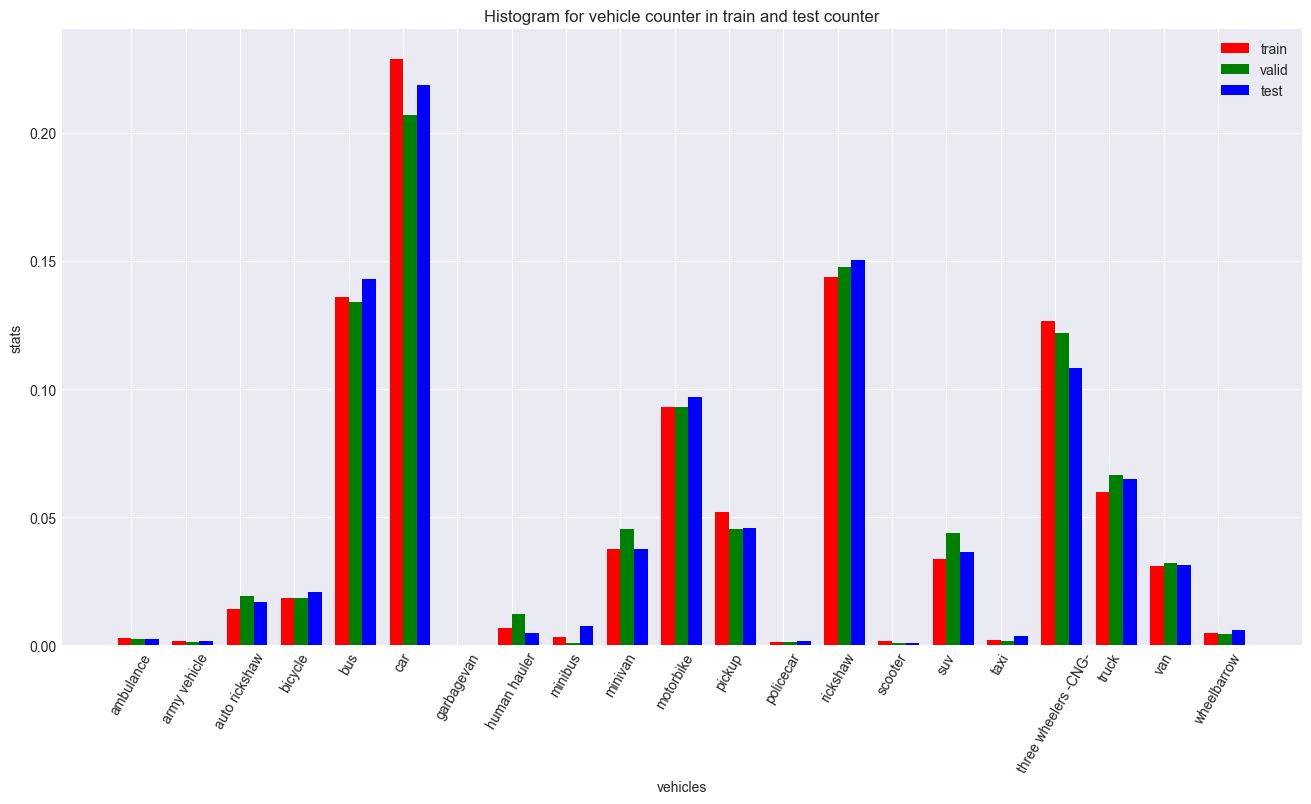

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the width of the bars
bar_width = 0.25

# Create the positions of the bars on the x-axis
r1 = np.arange(len(test_vehicles_counter))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

plt.figure(figsize=(16, 8))

# Plot the bars
plt.bar(r1, [val / sum(train_vehicles_counter) for val in train_vehicles_counter], color='r', width=bar_width, label='train')
plt.bar(r2, [val / sum(valid_vehicles_counter) for val in valid_vehicles_counter], color='g', width=bar_width, label='valid')
plt.bar(r3, [val / sum(test_vehicles_counter) for val in test_vehicles_counter], color='b', width=bar_width, label='test')



# Add xticks in the middle of the two bars
plt.xlabel('vehicles', fontsize=10)
plt.ylabel('stats', fontsize=10)
plt.xticks([r + bar_width / 2 for r in range(len(test_vehicles_counter))], classes_of_vehicles, fontsize=10, rotation=60)
plt.yticks(fontsize=10)

plt.title("Histogram for vehicle counter in train and test counter")
plt.legend()
plt.show()

In [39]:
print(f"% Train: {(len(df_training) * 100 / 3004):.3f}")
print(f"% Valid: {(len(df_validation) * 100 / 3004):.3f}")
print(f"% Test: {(len(df_testing) * 100 / 3004):.3f}")

% Train: 69.973
% Valid: 10.020
% Test: 20.007


In [40]:
save_dir = "csv_data"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

df_training.to_csv(os.path.join(save_dir, 'train.csv'), index=False)
df_validation.to_csv(os.path.join(save_dir, 'valid.csv'), index=False)
df_testing.to_csv(os.path.join(save_dir, 'test.csv'), index=False)

Za pomocą stworzonej funkcji zmienimy strukturę plików aby można było odnieść się do nich przez plik `dataset_1.yaml` który pozwala wytrenować yolo. W razie potrzeby można zmienić dowolne zmienne w celu zamiany struktury

In [47]:
from change_file_struct import change_file_structure

save_dir = "csv_data"

source_dir = "archive/trafic_data"
source_dir2 = r"D:\vehicle_detection\trafic_data"
dest_dir = 'dataset'

new_dir_structure = {
    dest_dir: {
        'images': {
            'train': None,
            'valid': None,
            'test': None
        },
        'labels': {
            'train': None,
            'valid': None,
            'test': None
        }
    }
}

df_subdir_mapping = {
    'df_train': 'train',
    'df_valid': 'valid',
    'df_test': 'test'
}

change_file_structure(save_dir, source_dir2, dest_dir, new_dir_structure, df_subdir_mapping)

# YOLOv8

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
from ultralytics import YOLO

#settings_file = "C:/Users/juziu/AppData/Roaming/Ultralytics/settings.yaml"
#file_name = "dataset/data_1.yaml"

#settings_file2 = "C:/Users/juziu/AppData/Roaming/Ultralytics/settings.yaml"
file_name2 = r"D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml"


#with open(settings_file, 'r') as file:
#    settings = yaml.safe_load(file)
#settings['datasets_dir'] = os.path.abspath(file_name)
#with open(settings_file, 'w') as file:
#    yaml.safe_dump(settings, file)



model_v8 = YOLO("yolov8n.pt")
model_v8.to('cuda:0')


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:

results = model_v8.train(data=file_name2, epochs=40)

engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

train: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train.cache... 2102 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2102/2102 [00:00<?, ?it/s]

train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed



val: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      2.68G      1.512      3.539      1.168         40        640: 100%|██████████| 132/132 [00:26<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.71it/s]

                   all        301       2429      0.562      0.111     0.0925     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      2.89G       1.48      2.271      1.166         95        640: 100%|██████████| 132/132 [00:23<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]

                   all        301       2429      0.609      0.149      0.139     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      3.11G      1.438      2.011      1.157        211        640: 100%|██████████| 132/132 [00:19<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        301       2429       0.56      0.174      0.159     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      3.35G      1.399      1.886      1.146         76        640: 100%|██████████| 132/132 [00:19<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]

                   all        301       2429      0.622      0.181      0.185      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      3.59G      1.372      1.786      1.137        156        640: 100%|██████████| 132/132 [00:20<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


                   all        301       2429      0.582      0.217      0.198       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      2.99G       1.37      1.704      1.125         57        640: 100%|██████████| 132/132 [00:20<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.75it/s]

                   all        301       2429      0.574      0.239      0.213      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      3.14G      1.344      1.653      1.117         56        640: 100%|██████████| 132/132 [00:18<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.40it/s]

                   all        301       2429      0.653      0.224      0.222      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      2.87G      1.325      1.563      1.112         47        640: 100%|██████████| 132/132 [00:19<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]

                   all        301       2429      0.616      0.258      0.244      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      3.24G      1.323      1.533      1.106         78        640: 100%|██████████| 132/132 [00:19<00:00,  6.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.47it/s]

                   all        301       2429      0.543      0.281      0.245       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      3.48G      1.308      1.496      1.101        108        640: 100%|██████████| 132/132 [00:20<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]

                   all        301       2429       0.65      0.245      0.265      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      2.75G      1.281      1.458      1.088         51        640: 100%|██████████| 132/132 [00:20<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.75it/s]

                   all        301       2429      0.612      0.266      0.269      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      3.15G      1.283      1.437      1.087        122        640: 100%|██████████| 132/132 [00:29<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]

                   all        301       2429       0.54       0.27      0.268      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      2.63G      1.259      1.389       1.08         76        640: 100%|██████████| 132/132 [00:29<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

                   all        301       2429      0.588      0.278      0.278      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      3.93G      1.258      1.361      1.081         88        640: 100%|██████████| 132/132 [00:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


                   all        301       2429      0.651      0.239      0.288      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40       3.6G      1.261      1.331      1.077         77        640: 100%|██████████| 132/132 [00:21<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

                   all        301       2429      0.569       0.29      0.281       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      3.51G      1.267      1.329      1.074         95        640: 100%|██████████| 132/132 [00:18<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.99it/s]

                   all        301       2429      0.642      0.302      0.305      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      3.18G      1.238      1.289      1.064         40        640: 100%|██████████| 132/132 [00:17<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.43it/s]

                   all        301       2429      0.688      0.255      0.305      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      3.33G      1.232      1.267      1.067         79        640: 100%|██████████| 132/132 [00:17<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.18it/s]

                   all        301       2429        0.6      0.313      0.318      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      3.39G      1.221      1.248       1.06        141        640: 100%|██████████| 132/132 [00:17<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.49it/s]

                   all        301       2429      0.661      0.268      0.318      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40      3.12G      1.233      1.236       1.06         93        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.70it/s]

                   all        301       2429      0.691      0.253      0.297      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40      2.98G      1.211      1.224      1.048         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.60it/s]

                   all        301       2429      0.705      0.264      0.309      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      3.25G        1.2      1.196      1.052         68        640: 100%|██████████| 132/132 [00:17<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        301       2429       0.61      0.303      0.333      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      3.51G      1.189      1.183      1.045         98        640: 100%|██████████| 132/132 [00:18<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.09it/s]

                   all        301       2429      0.527       0.31      0.343      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      3.31G      1.198      1.171      1.048         96        640: 100%|██████████| 132/132 [00:17<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        301       2429      0.582      0.309      0.352      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      3.36G      1.189      1.155      1.042        163        640: 100%|██████████| 132/132 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        301       2429      0.654      0.272      0.331       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      3.23G      1.181      1.138      1.041        111        640: 100%|██████████| 132/132 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        301       2429      0.494      0.349      0.341      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      3.46G      1.166       1.11      1.032        118        640: 100%|██████████| 132/132 [00:17<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]

                   all        301       2429      0.567      0.363      0.359       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      2.84G      1.159      1.103      1.033        115        640: 100%|██████████| 132/132 [00:17<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        301       2429      0.548      0.341      0.345      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40      3.63G      1.164      1.091      1.036        118        640: 100%|██████████| 132/132 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]

                   all        301       2429      0.591      0.337      0.359      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      3.12G      1.155      1.078      1.027         80        640: 100%|██████████| 132/132 [00:18<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.47it/s]

                   all        301       2429      0.554      0.354      0.359      0.232


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.54G      1.177      1.092      1.026         59        640: 100%|██████████| 132/132 [00:17<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]

                   all        301       2429      0.464      0.377      0.351      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      3.06G      1.138      1.045      1.016         41        640: 100%|██████████| 132/132 [00:16<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.72it/s]

                   all        301       2429      0.507      0.348      0.354      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      3.11G      1.134       1.03      1.006         42        640: 100%|██████████| 132/132 [00:17<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.19it/s]

                   all        301       2429      0.518       0.35       0.35      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      3.13G      1.127      1.019      1.009         27        640: 100%|██████████| 132/132 [00:17<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]

                   all        301       2429      0.659      0.291      0.357       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.99G      1.125      1.001      1.009         29        640: 100%|██████████| 132/132 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        301       2429      0.611      0.316      0.349      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.71G      1.107     0.9824     0.9967         48        640: 100%|██████████| 132/132 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.75it/s]

                   all        301       2429      0.558      0.364      0.358       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      3.66G      1.109     0.9775          1         33        640: 100%|██████████| 132/132 [00:17<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        301       2429      0.528      0.326      0.346      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      3.34G      1.114      0.973     0.9985         94        640: 100%|██████████| 132/132 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        301       2429      0.578      0.327      0.354      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      3.18G      1.104     0.9636     0.9955         37        640: 100%|██████████| 132/132 [00:17<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.50it/s]

                   all        301       2429      0.645      0.295      0.358      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.78G       1.09      0.952     0.9908         42        640: 100%|██████████| 132/132 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.35it/s]

                   all        301       2429      0.629      0.302      0.353      0.229



40 epochs completed in 0.258 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.12.3 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]


                   all        301       2429       0.59      0.338      0.359      0.236
             ambulance          6          6          1          0    0.00351    0.00246
          army vehicle          6          7      0.887      0.286      0.368      0.295
         auto rickshaw         15         38      0.563      0.474      0.449       0.27
               bicycle         44         55       0.57      0.364      0.345      0.167
                   bus        155        335      0.657      0.639      0.677       0.46
                   car        175        541      0.639      0.701      0.692      0.458
          human hauler         16         23      0.248     0.0435      0.145     0.0712
               minibus          5          7      0.219      0.143      0.166      0.156
               minivan         64        107      0.396       0.29      0.261      0.185
             motorbike        121        238      0.647      0.616      0.622       0.31
                picku

In [4]:

model_v8_y = YOLO("yolov8n.yaml")
model_v8_y.to('cuda:0')


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [5]:
results = model_v8_y.train(data=file_name2, epochs=35)

engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchsc

train: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train... 2102 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2102/2102 [00:01<00:00, 1602.31it/s]

train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


train: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train.cache


val: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<00:00, 911.83it/s]


val: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid.cache
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.71G      3.854      5.272       4.22         40        640: 100%|██████████| 132/132 [00:21<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.14it/s]

                   all        301       2429          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.89G      3.528      4.641       3.63         95        640: 100%|██████████| 132/132 [00:18<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        301       2429      0.153     0.0112    0.00288    0.00103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      3.12G      3.274      4.135       3.07        211        640: 100%|██████████| 132/132 [00:18<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        301       2429      0.129     0.0177    0.00459    0.00144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      3.35G      2.961      3.772        2.7         76        640: 100%|██████████| 132/132 [00:18<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.61it/s]

                   all        301       2429      0.195     0.0317     0.0156     0.0061



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      3.59G      2.721      3.448       2.43        156        640: 100%|██████████| 132/132 [00:18<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        301       2429       0.21     0.0435     0.0223    0.00871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.99G      2.576       3.21      2.244         57        640: 100%|██████████| 132/132 [00:18<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]

                   all        301       2429      0.321     0.0552     0.0392      0.016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      3.13G      2.451      3.077      2.134         56        640: 100%|██████████| 132/132 [00:18<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        301       2429       0.24     0.0767     0.0489     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.88G      2.342      2.928      2.037         47        640: 100%|██████████| 132/132 [00:19<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.69it/s]

                   all        301       2429      0.352     0.0666     0.0535     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      3.25G      2.302      2.832      1.977         78        640: 100%|██████████| 132/132 [00:19<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        301       2429      0.384     0.0847     0.0587     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      3.49G       2.25      2.764      1.928        108        640: 100%|██████████| 132/132 [00:19<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        301       2429      0.399     0.0821      0.066     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.76G      2.189      2.669      1.863         51        640: 100%|██████████| 132/132 [00:19<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.71it/s]

                   all        301       2429      0.454     0.0967     0.0742      0.036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35       3.2G      2.158      2.623      1.844        122        640: 100%|██████████| 132/132 [00:18<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.13it/s]


                   all        301       2429      0.517       0.09     0.0716     0.0359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.64G      2.111      2.557      1.804         76        640: 100%|██████████| 132/132 [00:19<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]

                   all        301       2429      0.523     0.0969      0.074     0.0362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      3.94G      2.087      2.506      1.785         88        640: 100%|██████████| 132/132 [00:19<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.76it/s]

                   all        301       2429      0.514       0.11     0.0852     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      3.61G      2.071      2.453      1.751         77        640: 100%|██████████| 132/132 [00:19<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        301       2429      0.583      0.115     0.0937     0.0473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      3.43G      2.056       2.43      1.735         95        640: 100%|██████████| 132/132 [00:19<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

                   all        301       2429      0.601      0.109     0.0969     0.0487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      3.18G      2.019      2.388      1.706         40        640: 100%|██████████| 132/132 [00:20<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.85it/s]

                   all        301       2429      0.585      0.118      0.098     0.0504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      3.34G      2.007       2.36      1.707         79        640: 100%|██████████| 132/132 [00:18<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.63it/s]

                   all        301       2429      0.554      0.126      0.106     0.0563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35       3.4G      1.972      2.324      1.684        141        640: 100%|██████████| 132/132 [00:19<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]

                   all        301       2429      0.599      0.114      0.105     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      3.13G      1.983      2.306      1.673         93        640: 100%|██████████| 132/132 [00:19<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]

                   all        301       2429      0.564      0.127       0.11     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      2.92G      1.947      2.272       1.64         76        640: 100%|██████████| 132/132 [00:19<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        301       2429      0.554      0.134      0.117     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      3.26G      1.937      2.245      1.645         68        640: 100%|██████████| 132/132 [00:18<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.77it/s]

                   all        301       2429      0.579       0.13      0.124     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      3.51G      1.921      2.226      1.625         98        640: 100%|██████████| 132/132 [00:18<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        301       2429      0.564      0.126      0.122      0.067



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      3.31G      1.916      2.201      1.625         96        640: 100%|██████████| 132/132 [00:18<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.02it/s]

                   all        301       2429      0.579      0.135      0.126     0.0689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      3.37G      1.896      2.175      1.604        163        640: 100%|██████████| 132/132 [00:18<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.77it/s]

                   all        301       2429      0.643      0.129      0.125     0.0678


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      3.03G      1.841        2.2      1.571         93        640: 100%|██████████| 132/132 [00:18<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        301       2429      0.465       0.13      0.131     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.76G      1.824      2.126      1.565         26        640: 100%|██████████| 132/132 [00:17<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.12it/s]

                   all        301       2429      0.584      0.137      0.139     0.0773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.94G       1.81      2.091       1.56         40        640: 100%|██████████| 132/132 [00:18<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.62it/s]

                   all        301       2429      0.542      0.144      0.134     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      3.02G      1.812      2.076      1.558         33        640: 100%|██████████| 132/132 [00:17<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.85it/s]

                   all        301       2429       0.57      0.134      0.132     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35       2.7G      1.794      2.053      1.543         42        640: 100%|██████████| 132/132 [00:18<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]

                   all        301       2429      0.571      0.141       0.14     0.0782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.62G      1.788      2.018      1.532         56        640: 100%|██████████| 132/132 [00:17<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]

                   all        301       2429      0.615       0.14      0.146      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      3.12G      1.787      2.019      1.538         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.41it/s]

                   all        301       2429      0.542      0.143      0.148      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      3.08G      1.782      2.008      1.523         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.54it/s]

                   all        301       2429      0.568      0.138      0.146     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      3.07G      1.775      1.995      1.522         28        640: 100%|██████████| 132/132 [00:17<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.18it/s]

                   all        301       2429      0.621      0.139      0.146     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      3.03G      1.753      1.984      1.514         28        640: 100%|██████████| 132/132 [00:16<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.21it/s]

                   all        301       2429      0.611      0.144      0.145     0.0809



35 epochs completed in 0.220 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.12.3 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.53it/s]


                   all        301       2429      0.543      0.142      0.148     0.0841
             ambulance          6          6          1          0    0.00504    0.00252
          army vehicle          6          7          1          0          0          0
         auto rickshaw         15         38      0.365      0.132      0.133     0.0742
               bicycle         44         55      0.254     0.0364      0.068     0.0257
                   bus        155        335      0.424      0.334      0.321      0.205
                   car        175        541      0.407      0.492      0.446      0.259
          human hauler         16         23          1          0     0.0343     0.0172
               minibus          5          7          1          0    0.00672    0.00475
               minivan         64        107      0.215     0.0654     0.0755     0.0423
             motorbike        121        238      0.391      0.391      0.313      0.119
                picku

In [5]:
model_v5_y = YOLO("yolov5n.yaml")
model_v5_y.to('cuda:0')


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_st

In [6]:
results = model_v5_y.train(data=file_name2, epochs=35)

engine\trainer: task=detect, mode=train, model=yolov5n.yaml, data=D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchsc

train: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train... 2102 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2102/2102 [00:01<00:00, 1541.42it/s]

train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


train: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train.cache


val: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<00:00, 885.03it/s]


val: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid.cache
Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.74G      3.855      5.315      4.143         40        640: 100%|██████████| 132/132 [00:21<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.88it/s]

                   all        301       2429          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.91G      3.588      4.744      3.579         95        640: 100%|██████████| 132/132 [00:18<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.72it/s]

                   all        301       2429      0.251     0.0155   0.000666   0.000243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      3.07G      3.388      4.359      3.114        211        640: 100%|██████████| 132/132 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        301       2429    0.00208     0.0604    0.00188   0.000557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      3.18G      3.164       4.06      2.761         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.12it/s]

                   all        301       2429      0.132     0.0168    0.00698    0.00231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      3.44G      2.894      3.728      2.472        156        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.26it/s]

                   all        301       2429      0.165     0.0239     0.0139    0.00525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.93G      2.697      3.409      2.235         57        640: 100%|██████████| 132/132 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.90it/s]

                   all        301       2429      0.173     0.0498     0.0265     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      3.04G      2.519      3.228      2.083         56        640: 100%|██████████| 132/132 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.03it/s]

                   all        301       2429      0.224     0.0595      0.038     0.0166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.84G      2.408      3.048      1.972         47        640: 100%|██████████| 132/132 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.00it/s]

                   all        301       2429      0.288     0.0589     0.0447     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      3.13G       2.34      2.919      1.898         78        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.87it/s]

                   all        301       2429       0.38     0.0782     0.0517     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      3.43G      2.296      2.855      1.865        108        640: 100%|██████████| 132/132 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.94it/s]

                   all        301       2429      0.393       0.08     0.0608     0.0291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.72G      2.224      2.761      1.802         51        640: 100%|██████████| 132/132 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.04it/s]

                   all        301       2429      0.373      0.103     0.0682     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      3.09G       2.19      2.709      1.778        122        640: 100%|██████████| 132/132 [00:17<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.11it/s]

                   all        301       2429      0.408     0.0869     0.0701     0.0337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.52G      2.148      2.636      1.748         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.34it/s]

                   all        301       2429      0.557      0.096     0.0758     0.0381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35       3.9G      2.124      2.587      1.732         88        640: 100%|██████████| 132/132 [00:17<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]

                   all        301       2429      0.499      0.107     0.0835     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      3.42G      2.104      2.522      1.698         77        640: 100%|██████████| 132/132 [00:17<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.10it/s]

                   all        301       2429      0.517      0.116     0.0914     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      3.45G      2.099      2.518      1.693         95        640: 100%|██████████| 132/132 [00:17<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.82it/s]

                   all        301       2429      0.464      0.116     0.0897     0.0455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35       3.2G      2.064      2.469      1.658         40        640: 100%|██████████| 132/132 [00:40<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.83it/s]

                   all        301       2429       0.59      0.111      0.094     0.0488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      3.24G      2.049      2.439      1.659         79        640: 100%|██████████| 132/132 [00:17<00:00,  7.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.03it/s]

                   all        301       2429      0.492      0.118     0.0942     0.0498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      3.42G      2.018      2.408       1.64        141        640: 100%|██████████| 132/132 [00:16<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.10it/s]

                   all        301       2429      0.526      0.113     0.0966     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      3.15G      2.038      2.389      1.639         93        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        301       2429      0.538      0.132     0.0995     0.0514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35       2.9G      1.992      2.344      1.604         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.22it/s]

                   all        301       2429      0.557      0.133      0.108     0.0573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      3.15G       1.99      2.341      1.617         68        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        301       2429      0.546      0.141      0.109     0.0564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35       3.4G      1.971      2.308      1.593         98        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        301       2429      0.601      0.134       0.11     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35       3.2G      1.963      2.284      1.588         96        640: 100%|██████████| 132/132 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]

                   all        301       2429      0.624      0.136      0.118     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      3.33G      1.955      2.259      1.578        163        640: 100%|██████████| 132/132 [00:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        301       2429      0.594       0.12      0.117     0.0633


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.99G      1.901      2.285      1.543         93        640: 100%|██████████| 132/132 [00:17<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        301       2429      0.549      0.119      0.111     0.0603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.65G      1.878      2.222      1.545         26        640: 100%|██████████| 132/132 [00:16<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.94it/s]

                   all        301       2429      0.567      0.137      0.119     0.0657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.88G      1.865      2.179      1.531         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.08it/s]

                   all        301       2429      0.565      0.145      0.124     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.93G      1.859      2.173      1.531         33        640: 100%|██████████| 132/132 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]

                   all        301       2429      0.555      0.134      0.114     0.0607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.51G      1.847      2.135      1.512         42        640: 100%|██████████| 132/132 [00:16<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        301       2429      0.561      0.143      0.125     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.51G      1.841      2.115      1.512         56        640: 100%|██████████| 132/132 [00:16<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.29it/s]

                   all        301       2429      0.567      0.143      0.126     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      3.03G      1.833      2.108      1.516         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.93it/s]

                   all        301       2429      0.576      0.147      0.128     0.0711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.93G      1.831      2.093      1.501         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.22it/s]

                   all        301       2429      0.578      0.142      0.128       0.07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      3.09G      1.827      2.088        1.5         28        640: 100%|██████████| 132/132 [00:16<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.39it/s]

                   all        301       2429      0.578      0.146      0.128     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.95G      1.816      2.071      1.499         28        640: 100%|██████████| 132/132 [00:16<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.15it/s]

                   all        301       2429      0.578      0.152      0.129      0.071



35 epochs completed in 0.212 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 5.3MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 5.3MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.12.3 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv5n summary (fused): 193 layers, 2507039 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.61it/s]


                   all        301       2429      0.578      0.153      0.129      0.071
             ambulance          6          6          1          0    0.00361    0.00108
          army vehicle          6          7          1          0    0.00824    0.00412
         auto rickshaw         15         38      0.293      0.105      0.101     0.0595
               bicycle         44         55      0.493     0.0727     0.0708     0.0218
                   bus        155        335      0.359      0.364      0.305      0.183
                   car        175        541      0.362      0.506      0.436      0.251
          human hauler         16         23          1          0      0.018     0.0109
               minibus          5          7          1          0    0.00499   0.000998
               minivan         64        107      0.181      0.149     0.0944     0.0448
             motorbike        121        238      0.386      0.382      0.326      0.137
                picku

In [4]:
model_v5 = YOLO("yolov5n.pt")
model_v5.to('cuda:0')


PRO TIP  Replace 'model=yolov5n.pt' with new 'model=yolov5nu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_st

In [5]:
results = model_v5.train(data=file_name2, epochs=35)

engine\trainer: task=detect, mode=train, model=yolov5n.pt, data=D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

train: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train... 2102 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2102/2102 [00:01<00:00, 1627.04it/s]

train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed


train: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train.cache


val: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<00:00, 948.85it/s]


val: New cache created: D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid.cache
Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      2.74G       1.57      3.656      1.187         40        640: 100%|██████████| 132/132 [00:23<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.47it/s]

                   all        301       2429      0.455      0.113     0.0799     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      2.92G      1.536      2.361      1.181         95        640: 100%|██████████| 132/132 [00:18<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.80it/s]

                   all        301       2429       0.54      0.157      0.123     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      3.07G      1.478      2.072      1.171        211        640: 100%|██████████| 132/132 [00:17<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.93it/s]

                   all        301       2429      0.546      0.191      0.148      0.089



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      3.18G      1.445      1.944      1.155         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.68it/s]

                   all        301       2429      0.575      0.205      0.174      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      3.44G      1.417      1.864      1.148        156        640: 100%|██████████| 132/132 [00:17<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.12it/s]

                   all        301       2429      0.596       0.21       0.19      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      2.93G       1.41      1.785      1.136         57        640: 100%|██████████| 132/132 [00:17<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.13it/s]

                   all        301       2429      0.566      0.222      0.193      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      3.04G      1.391      1.746      1.131         56        640: 100%|██████████| 132/132 [00:18<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.18it/s]

                   all        301       2429      0.674      0.219      0.218      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      2.84G      1.361      1.657      1.124         47        640: 100%|██████████| 132/132 [00:17<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]

                   all        301       2429      0.652      0.223      0.228      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      3.13G       1.36      1.619      1.117         78        640: 100%|██████████| 132/132 [00:17<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.27it/s]

                   all        301       2429      0.624      0.237      0.232      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      3.43G       1.35      1.587       1.11        108        640: 100%|██████████| 132/132 [00:17<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]

                   all        301       2429      0.649      0.224      0.235      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      2.72G      1.329      1.549      1.102         51        640: 100%|██████████| 132/132 [00:17<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.08it/s]

                   all        301       2429      0.666      0.212      0.244      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      3.09G      1.328      1.527      1.098        122        640: 100%|██████████| 132/132 [00:17<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.18it/s]

                   all        301       2429      0.655      0.231      0.248      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      2.52G      1.308      1.486      1.096         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.92it/s]

                   all        301       2429      0.722      0.216      0.248      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35       3.9G      1.306      1.458      1.094         88        640: 100%|██████████| 132/132 [00:18<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.55it/s]

                   all        301       2429      0.633      0.252      0.277      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      3.42G      1.307      1.432       1.09         77        640: 100%|██████████| 132/132 [00:18<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]


                   all        301       2429      0.646       0.25      0.269      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      3.45G      1.308      1.417      1.085         95        640: 100%|██████████| 132/132 [00:20<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.54it/s]

                   all        301       2429      0.685      0.237      0.281      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35       3.2G      1.285      1.392      1.073         40        640: 100%|██████████| 132/132 [00:19<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        301       2429      0.622      0.268      0.298      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      3.24G      1.278      1.365      1.078         79        640: 100%|██████████| 132/132 [00:21<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.44it/s]

                   all        301       2429      0.621      0.257      0.299       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      3.42G      1.261      1.342      1.067        141        640: 100%|██████████| 132/132 [00:20<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


                   all        301       2429      0.632      0.286      0.303      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      3.15G      1.285      1.333      1.073         93        640: 100%|██████████| 132/132 [00:20<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.42it/s]

                   all        301       2429      0.712      0.241      0.296      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35       2.9G      1.256       1.32      1.059         76        640: 100%|██████████| 132/132 [00:17<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        301       2429      0.666      0.253      0.296      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      3.15G      1.244      1.293      1.061         68        640: 100%|██████████| 132/132 [00:17<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.35it/s]

                   all        301       2429      0.578      0.339      0.325      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35       3.4G      1.241      1.279      1.057         98        640: 100%|██████████| 132/132 [00:18<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.17it/s]

                   all        301       2429      0.475      0.319      0.314      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35       3.2G      1.239      1.266      1.056         96        640: 100%|██████████| 132/132 [00:18<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.37it/s]

                   all        301       2429      0.475      0.364       0.33      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      3.33G      1.237       1.25      1.055        163        640: 100%|██████████| 132/132 [00:18<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.52it/s]

                   all        301       2429      0.589      0.303      0.324      0.209


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      2.99G       1.25      1.274      1.044         93        640: 100%|██████████| 132/132 [00:17<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        301       2429      0.565      0.309       0.31      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      2.65G      1.231      1.231      1.043         26        640: 100%|██████████| 132/132 [00:16<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]

                   all        301       2429      0.584      0.311      0.324      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      2.88G      1.222        1.2      1.037         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.40it/s]

                   all        301       2429      0.625      0.309       0.34      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      2.93G      1.203      1.182      1.033         33        640: 100%|██████████| 132/132 [00:16<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.48it/s]

                   all        301       2429       0.58      0.316      0.326      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      2.51G        1.2      1.173      1.029         42        640: 100%|██████████| 132/132 [00:16<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.32it/s]

                   all        301       2429      0.502      0.342      0.327      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      2.51G      1.192      1.156      1.028         56        640: 100%|██████████| 132/132 [00:16<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.46it/s]

                   all        301       2429      0.612      0.316      0.338      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      3.03G      1.183      1.141      1.025         40        640: 100%|██████████| 132/132 [00:17<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.27it/s]

                   all        301       2429      0.676      0.293      0.348      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      2.93G      1.186      1.135      1.023         40        640: 100%|██████████| 132/132 [00:16<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        301       2429      0.604      0.317      0.349      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      3.09G      1.176      1.124       1.02         28        640: 100%|██████████| 132/132 [00:17<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.33it/s]

                   all        301       2429       0.59      0.304      0.348      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      2.95G      1.172      1.116      1.018         28        640: 100%|██████████| 132/132 [00:16<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.16it/s]

                   all        301       2429      0.594      0.326      0.353      0.228



35 epochs completed in 0.214 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 5.3MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 5.3MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.12.3 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv5n summary (fused): 193 layers, 2507039 parameters, 0 gradients, 7.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


                   all        301       2429      0.593      0.327      0.353      0.228
             ambulance          6          6          1          0    0.00888    0.00695
          army vehicle          6          7        0.6      0.286      0.332      0.255
         auto rickshaw         15         38      0.441      0.316      0.363       0.23
               bicycle         44         55      0.462      0.309       0.34      0.171
                   bus        155        335      0.619      0.615      0.632      0.424
                   car        175        541      0.558      0.708      0.669      0.449
          human hauler         16         23      0.483      0.042      0.341       0.17
               minibus          5          7          1          0     0.0174       0.01
               minivan         64        107      0.333      0.262      0.244      0.162
             motorbike        121        238      0.513      0.622      0.598      0.285
                picku

In [4]:
model_v8s = YOLO("yolov8s.pt")
model_v8s.to('cuda:0')


100%|██████████| 21.5M/21.5M [00:02<00:00, 11.1MB/s]


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [5]:
results = model_v8s.train(data=file_name2, epochs=35)

engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:\vehicle_detection\Vehicle-Images-Detection\dataset\data_1.yaml, epochs=35, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

train: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\train.cache... 2102 images, 2 backgrounds, 0 corrupt: 100%|██████████| 2102/2102 [00:00<?, ?it/s]

train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--359-_PNG.rf.43bcf36efe5cf8c37552d2c45fffea60.jpg: 9 duplicate labels removed
train: WARNING  D:\vehicle_detection\Vehicle-Images-Detection\dataset\images\train\Pias--360-_PNG.rf.8405b0e44009a9300e0a1100ccf7d5b3.jpg: 7 duplicate labels removed



val: Scanning D:\vehicle_detection\Vehicle-Images-Detection\dataset\labels\valid.cache... 301 images, 0 backgrounds, 0 corrupt: 100%|██████████| 301/301 [00:00<?, ?it/s]


Plotting labels to runs\detect\train6\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train6
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      4.71G      1.394      2.499      1.146         40        640: 100%|██████████| 132/132 [00:32<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]

                   all        301       2429      0.635      0.197      0.189      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      4.77G      1.312      1.592      1.117         95        640: 100%|██████████| 132/132 [00:28<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        301       2429      0.622      0.231      0.231      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      4.77G      1.301      1.466      1.116        211        640: 100%|██████████| 132/132 [00:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.33it/s]

                   all        301       2429      0.504      0.319      0.278      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      5.05G      1.272      1.354      1.105         76        640: 100%|██████████| 132/132 [00:30<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        301       2429      0.508       0.29      0.286      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35       5.3G      1.253       1.29      1.097        156        640: 100%|██████████| 132/132 [00:29<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        301       2429       0.57      0.292      0.317      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      4.95G      1.246      1.227      1.089         57        640: 100%|██████████| 132/132 [00:29<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        301       2429      0.639      0.317      0.339      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      4.91G      1.226      1.191      1.083         56        640: 100%|██████████| 132/132 [00:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

                   all        301       2429      0.546      0.319       0.34      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      4.44G      1.202      1.129      1.074         47        640: 100%|██████████| 132/132 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        301       2429      0.592       0.36      0.375      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      4.84G      1.194      1.098      1.067         78        640: 100%|██████████| 132/132 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        301       2429      0.507      0.377      0.374      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.29G      1.179       1.07       1.06        108        640: 100%|██████████| 132/132 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        301       2429      0.516      0.364      0.375      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      4.44G      1.153      1.017      1.047         51        640: 100%|██████████| 132/132 [00:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        301       2429      0.618      0.365      0.387      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.02G      1.145      1.013      1.045        122        640: 100%|██████████| 132/132 [00:29<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.66it/s]

                   all        301       2429      0.561      0.395      0.389      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      4.41G      1.125     0.9733      1.038         76        640: 100%|██████████| 132/132 [00:28<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

                   all        301       2429      0.658      0.366      0.391       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.51G      1.114     0.9489      1.035         88        640: 100%|██████████| 132/132 [00:28<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]

                   all        301       2429      0.567       0.37      0.403      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.15G      1.118     0.9242      1.032         77        640: 100%|██████████| 132/132 [00:29<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.51it/s]

                   all        301       2429      0.587      0.367      0.404      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.47G      1.112      0.917      1.022         95        640: 100%|██████████| 132/132 [00:29<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        301       2429      0.587      0.382      0.405      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35       4.8G      1.095     0.8889      1.017         40        640: 100%|██████████| 132/132 [00:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]

                   all        301       2429      0.596      0.378      0.424      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.15G      1.081     0.8644      1.015         79        640: 100%|██████████| 132/132 [01:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        301       2429       0.63       0.39      0.416      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.44G      1.063     0.8483      1.007        141        640: 100%|██████████| 132/132 [00:28<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.42it/s]

                   all        301       2429      0.636      0.381       0.42      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.03G      1.077     0.8409      1.008         93        640: 100%|██████████| 132/132 [00:29<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]

                   all        301       2429      0.524      0.436      0.438      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      4.68G      1.048     0.8139     0.9954         76        640: 100%|██████████| 132/132 [00:29<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.77it/s]

                   all        301       2429       0.64      0.385      0.444      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      4.86G      1.035     0.7972     0.9929         68        640: 100%|██████████| 132/132 [00:28<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.66it/s]

                   all        301       2429      0.644      0.399      0.439       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.11G       1.03     0.7781     0.9912         98        640: 100%|██████████| 132/132 [00:28<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.46it/s]

                   all        301       2429      0.505      0.435      0.451      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.07G      1.024     0.7709     0.9886         96        640: 100%|██████████| 132/132 [00:28<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.66it/s]

                   all        301       2429      0.697      0.385      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35       5.1G      1.018     0.7554     0.9831        163        640: 100%|██████████| 132/132 [00:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.48it/s]

                   all        301       2429      0.579      0.439      0.465      0.297


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      4.58G      1.024     0.7265     0.9687         93        640: 100%|██████████| 132/132 [00:28<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.57it/s]

                   all        301       2429        0.6       0.43      0.467       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35       4.4G     0.9999     0.6918     0.9641         26        640: 100%|██████████| 132/132 [00:28<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.70it/s]

                   all        301       2429      0.711       0.41       0.49      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      4.74G     0.9879     0.6698     0.9608         40        640: 100%|██████████| 132/132 [00:31<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        301       2429      0.545      0.486      0.478      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      4.95G     0.9701     0.6533     0.9552         33        640: 100%|██████████| 132/132 [00:29<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

                   all        301       2429      0.501      0.487      0.483      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      4.38G     0.9639      0.642     0.9505         42        640: 100%|██████████| 132/132 [00:29<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        301       2429      0.685      0.416      0.465      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35       4.4G     0.9561     0.6319     0.9505         56        640: 100%|██████████| 132/132 [00:29<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        301       2429      0.635      0.448      0.476      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      4.89G     0.9506     0.6192     0.9471         40        640: 100%|██████████| 132/132 [00:28<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        301       2429      0.588      0.471      0.481      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      4.64G     0.9404     0.6063     0.9413         40        640: 100%|██████████| 132/132 [00:29<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]

                   all        301       2429      0.472      0.505      0.482      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      4.96G     0.9255     0.5931     0.9355         28        640: 100%|██████████| 132/132 [00:29<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.75it/s]

                   all        301       2429      0.513      0.512      0.488      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      4.97G     0.9205     0.5872     0.9349         28        640: 100%|██████████| 132/132 [00:27<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.65it/s]

                   all        301       2429      0.576      0.506      0.506      0.316



35 epochs completed in 0.337 hours.
Optimizer stripped from runs\detect\train6\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train6\weights\best.pt, 22.5MB

Validating runs\detect\train6\weights\best.pt...
Ultralytics YOLOv8.2.28  Python-3.12.3 torch-2.2.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


                   all        301       2429      0.579      0.494      0.506      0.316
             ambulance          6          6      0.143      0.167     0.0976     0.0192
          army vehicle          6          7      0.753      0.436      0.566      0.405
         auto rickshaw         15         38      0.627      0.531      0.561      0.328
               bicycle         44         55      0.523      0.364      0.379      0.214
                   bus        155        335      0.761      0.695       0.73      0.512
                   car        175        541      0.672      0.745      0.763      0.532
          human hauler         16         23      0.731      0.435      0.445      0.269
               minibus          5          7      0.421      0.429      0.431      0.221
               minivan         64        107      0.503      0.435      0.368      0.239
             motorbike        121        238      0.671       0.71      0.694      0.365
                picku